In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

import re

In [43]:
# df_b_5x = pd.read_csv('plot_data/Brain5xFAD_OzON_Results_04Jan2024.csv')
# df_b_wt = pd.read_csv('plot_data/BrainWT_OzON_Results_04Jan2024.csv')
# df_liver = pd.read_csv('plot_data/LiverOzON_04Jan2024.csv')


### I used this data for the previous plots on 04Jan2024    
# df_b_5x = pd.read_csv('../results/Brain5xFAD_OzON_Results_04Jan2024_7.csv')
# df_b_wt = pd.read_csv('../results/BrainWT_OzON_Results_04Jan2024_2.csv')
# df_liver = pd.read_csv('../results/LiverOzON_04Jan2024_2.csv')

# #updated for new data on 09Jan2024
# df_b_5x = pd.read_csv('../results/Brain5xFAD_OzON_Results_09Jan2024.csv')
# df_b_wt = pd.read_csv('../results/BrainWT_OzON_Results_09Jan2024.csv')
# df_liver = pd.read_csv('../results/LiverOzON_09Jan2024.csv')

#updated 14Jan2024
df_b_5x = pd.read_csv('../results/Brain5xFAD_OzON_Truth_Results_14Jan2024.csv')
df_b_wt = pd.read_csv('../results/BrainWT_OzON_Truth_Results_14Jan2024.csv')
df_liver = pd.read_csv('../results/Liver_OzON_Truth_Results_16Jan2024.csv')

df = pd.concat([df_b_wt, df_b_5x, df_liver])
#print len sum of all dataframes
print(len(df_b_wt) + len(df_b_5x) + len(df_liver))
# #drop Cluster_Label and Group columns
df = df.drop(['Area', 'Group','Cluster_Ground_Truth_Dif'], axis=1)
# #drop unnamed columns
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

515


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Match_Group,Cage,Mouse,Genotype,Biology,Group_Sample,FAC,TG,Max_Intensity,Cluster_RT,Area_DDT,Area_DDT_Ratio,SLBG_group
0,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,26428.0,1232,FAD185,FAD185_M4,WT,cereb,-1,FA16:1,TG(52:5),26428.0,12.015183,2903.0,0.09,9
1,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,732,FAD185,FAD185_M4,WT,cereb,-1,FA16:1,TG(52:5),2939.0,12.067500,271.0,0.09,9
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,1221,DOD94,DOD94_F3,WT,cortex,-1,FA16:1,TG(52:5),1126.0,12.015200,59.0,0.00,7
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,1225,FAD184,FAD184_F3,WT,cortex,-1,FA16:1,TG(52:5),3221.0,12.015450,273.0,0.00,8
4,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,16896.0,1233,FAD185,FAD185_M4,WT,cortex,-1,FA16:1,TG(52:5),16896.0,12.015200,1677.0,0.15,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,619.0,542,FAD131,FAD131_M2,5xFAD,liver,-1,FA18:1,"TG(58:5), TG(59:12)",619.0,16.041483,97.0,NaN,102
187,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,544,FAD173,FAD173_M1,5xFAD,liver,-1,FA18:1,"TG(58:5), TG(59:12)",642.0,16.041500,68.0,NaN,103
188,"[TG(59:13),TG(58:6)]_FA18:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,489.0,530,DOD73,DOD73_M2,5xFAD,liver,-1,FA18:1,"TG(58:6), TG(59:13)",489.0,15.509183,51.0,NaN,104
189,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.38,1293.0,531,FAD131,FAD131_M1,5xFAD,liver,-1,FA18:1,"TG(58:6), TG(59:13)",1293.0,15.509183,123.0,NaN,105


Add Liver Brain label

In [44]:

# # Define function to extract biology term
# def extract_biology(sample_id):
#     for term in ["liver", "cortex", "cereb", "hippo", "dienc"]:
#         if term in sample_id.lower():
#             return term
#     return None

# # Apply function to create new column
# df['Biology'] = df['Sample_ID'].apply(extract_biology)
# df['Genotype'] = df['Sample_ID'].apply(lambda x: '5xFAD' if 'WT' not in x else 'WT')

# # df.to_csv('df_for_gpt.csv')

# # Extracting the mouse name from the 'Sample_ID' column
# df['Mouse'] = df['Sample_ID'].apply(lambda x: '_'.join(x.split('_')[1:3]))
# df

In [45]:
df['SLBG_group'] = df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
df['Lipid_Biology_group'] = df.groupby(['Lipid', 'Biology']).ngroup()
# # Filter for 'liver' in Biology
# liver_df = df[df['Biology'] == 'liver']
# # Filter the DataFrame for each of the brain biology values and concatenate them into one DataFrame
# brain_df = pd.concat([
#     df[df['Biology'] == 'cortex'],
#     df[df['Biology'] == 'cereb'],
#     df[df['Biology'] == 'hippo'],
#     df[df['Biology'] == 'dienc']
# ])
# brain_df

# # Group by Lipid and db_pos
# liver_df['SLBG_group'] = liver_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# brain_df['SLBG_group'] = brain_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()



# # Assuming df is your DataFrame

# # Step 1: Extract the last part of the Lipid name
# df['FAC'] = df['Lipid'].str.extract(r'(FA\d+:\d+)$')

# Step 2: Sort the DataFrame
# We'll sort by the new 'Lipid_End' column, and then by the original 'Lipid' column to maintain order within each group
df = df.sort_values(by=['FAC', 'Lipid'], ascending=[True, True])

# If you specifically want 'FA16:1' to appear before 'FA18:1'
# You might need a custom sorting function or a categorical type for the 'FAC' column
df['FAC'] = pd.Categorical(df['FAC'], categories=['FA16:1', 'FA18:1'], ordered=True)
df = df.sort_values(by=['FAC', 'Lipid'])


df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Match_Group,Cage,Mouse,...,Biology,Group_Sample,FAC,TG,Max_Intensity,Cluster_RT,Area_DDT,Area_DDT_Ratio,SLBG_group,Lipid_Biology_group
0,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,26428.0,1232,FAD185,FAD185_M4,...,cereb,-1,FA16:1,TG(52:5),26428.0,12.015183,2903.0,0.09,22,5
1,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,732,FAD185,FAD185_M4,...,cereb,-1,FA16:1,TG(52:5),2939.0,12.067500,271.0,0.09,22,5
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,1221,DOD94,DOD94_F3,...,cortex,-1,FA16:1,TG(52:5),1126.0,12.015200,59.0,0.00,20,6
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,1225,FAD184,FAD184_F3,...,cortex,-1,FA16:1,TG(52:5),3221.0,12.015450,273.0,0.00,21,6
4,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,16896.0,1233,FAD185,FAD185_M4,...,cortex,-1,FA16:1,TG(52:5),16896.0,12.015200,1677.0,0.15,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,619.0,542,FAD131,FAD131_M2,...,liver,-1,FA18:1,"TG(58:5), TG(59:12)",619.0,16.041483,97.0,NaN,323,65
187,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,544,FAD173,FAD173_M1,...,liver,-1,FA18:1,"TG(58:5), TG(59:12)",642.0,16.041500,68.0,NaN,324,65
188,"[TG(59:13),TG(58:6)]_FA18:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,489.0,530,DOD73,DOD73_M2,...,liver,-1,FA18:1,"TG(58:6), TG(59:13)",489.0,15.509183,51.0,NaN,325,66
189,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.38,1293.0,531,FAD131,FAD131_M1,...,liver,-1,FA18:1,"TG(58:6), TG(59:13)",1293.0,15.509183,123.0,NaN,326,66


copy df to df2 to do db calcuations

In [46]:
# Copying df2 to create df3
df2 = df.copy()
import pandas as pd

# Assuming df is your DataFrame
# Replace df with your actual DataFrame variable name if it's different

# Group by 'SLBG_group' and sum the 'OzESI_Intensity' for each group
# Assign the summed intensity back to each row in the original DataFrame
df2['total_area'] = df2.groupby('SLBG_group')['Area_DDT'].transform('sum')



df2

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Match_Group,Cage,Mouse,...,Group_Sample,FAC,TG,Max_Intensity,Cluster_RT,Area_DDT,Area_DDT_Ratio,SLBG_group,Lipid_Biology_group,total_area
0,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,26428.0,1232,FAD185,FAD185_M4,...,-1,FA16:1,TG(52:5),26428.0,12.015183,2903.0,0.09,22,5,3174.0
1,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,732,FAD185,FAD185_M4,...,-1,FA16:1,TG(52:5),2939.0,12.067500,271.0,0.09,22,5,3174.0
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,1221,DOD94,DOD94_F3,...,-1,FA16:1,TG(52:5),1126.0,12.015200,59.0,0.00,20,6,59.0
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,1225,FAD184,FAD184_F3,...,-1,FA16:1,TG(52:5),3221.0,12.015450,273.0,0.00,21,6,273.0
4,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,16896.0,1233,FAD185,FAD185_M4,...,-1,FA16:1,TG(52:5),16896.0,12.015200,1677.0,0.15,23,6,1930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,619.0,542,FAD131,FAD131_M2,...,-1,FA18:1,"TG(58:5), TG(59:12)",619.0,16.041483,97.0,NaN,323,65,97.0
187,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,544,FAD173,FAD173_M1,...,-1,FA18:1,"TG(58:5), TG(59:12)",642.0,16.041500,68.0,NaN,324,65,68.0
188,"[TG(59:13),TG(58:6)]_FA18:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,489.0,530,DOD73,DOD73_M2,...,-1,FA18:1,"TG(58:6), TG(59:13)",489.0,15.509183,51.0,NaN,325,66,51.0
189,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.38,1293.0,531,FAD131,FAD131_M1,...,-1,FA18:1,"TG(58:6), TG(59:13)",1293.0,15.509183,123.0,NaN,326,66,123.0


In [47]:
# import pandas as pd

# # Assuming df2 is your DataFrame
# # Replace df2 with your actual DataFrame variable name if it's different

# # Function to calculate n-9% for each row
# def calculate_n9_percent(row):
#     if row['db_pos'] == 'n-9':
#         return (row['OzESI_Intensity'] / row['total_intensity']) * 100
#     else:
#         return 0  # Return 0 for rows where db_pos is not 'n-9'

# # Apply the function to each row
# df2['n-9%'] = df2.apply(calculate_n9_percent, axis=1)

# # Rename df2 to df3 as per your requirement
# df3 = df2.copy()
# # df3.to_excel('df3.xlsx')
# df3

In [48]:
# Creating a new dataframe df3 from df_liver2
df3 = df2.copy()
# Function to calculate n-9% for each row
def calculate_n9_percent(row):
    if row['db'] == 'n-9' and row['total_area'] != 0:
        return (row['Area_DDT'] / row['total_area']) * 100
    else:
        return 0  # Return 0 for rows where db is not 'n-9' or total_area is zero

# Apply the function to each row
df3['n-9%'] = df3.apply(calculate_n9_percent, axis=1)



# # Function to determine the value for the FAC column
# def determine_fac(lipid):
#     if 'FA18:1' in lipid:
#         return 'FA18:1'
#     elif 'FA16:1' in lipid:
#         return 'FA16:1'
#     else:
#         return None  # or some other default value

# # Apply the function to the Lipid column to create the FAC column
# df3['FAC'] = df3['Lipid'].apply(determine_fac)

# import pandas as pd
# import re

# # Function to extract TG values
# def extract_tg(lipid):
#     # Regular expression pattern to match TG(##:#) or similar patterns
#     pattern = r'TG\(\d+:\d+\)'
#     matches = re.findall(pattern, lipid)
#     return ', '.join(matches) if matches else None

# # Apply the function to the Lipid column to create the TG column
# df3['TG'] = df3['Lipid'].apply(extract_tg)




# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
df3['TG'] = df3['TG'].apply(sort_tg_values)
df3 = df3.sort_values(by=['FAC', 'TG'])


# Function to remove TG(##:0) patterns from the Lipid string
def remove_tg_zero(lipid):
    # Pattern to match TG(##:0)
    pattern = r'TG\(\d+:0\)'
    # Remove TG(##:0) patterns
    new_lipid = re.sub(pattern, '', lipid)
    # Remove any extra commas and spaces left after removal
    new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
    return new_lipid

# Apply the function to the Lipid column
df3['Lipid'] = df3['Lipid'].apply(remove_tg_zero)

# Continue with the rest of your code for sorting
# ... [rest of your code] ...

# Displaying df_l


# Displaying df3 with the new relative intensity columns
df3

# Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
filtered_rows = df3[(df3['Lipid'].str.contains('TG\(56:7\)')) ]

filtered_rows

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Match_Group,Cage,Mouse,...,FAC,TG,Max_Intensity,Cluster_RT,Area_DDT,Area_DDT_Ratio,SLBG_group,Lipid_Biology_group,total_area,n-9%
17,"[TG(56:7),]_FA16:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,840.8,651.6,12.89,1356.0,520,DOD73,DOD73_M2,...,FA16:1,TG(56:7),1356.0,12.890017,231.0,0.00,263,45,231.0,0.000000
18,"[TG(56:7),]_FA16:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,840.8,651.6,12.95,1283.0,521,FAD131,FAD131_M1,...,FA16:1,TG(56:7),1283.0,12.934183,216.0,0.52,264,45,329.0,0.000000
19,"[TG(56:7),]_FA16:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,812.8,651.6,13.03,808.0,421,FAD131,FAD131_M1,...,FA16:1,TG(56:7),808.0,13.029450,113.0,0.52,264,45,329.0,34.346505
20,"[TG(56:7),]_FA16:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-7,840.8,651.6,13.07,1568.0,522,FAD131,FAD131_M2,...,FA16:1,TG(56:7),1568.0,13.067683,194.0,0.71,265,45,331.0,0.000000
21,"[TG(56:7),]_FA16:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,812.8,651.6,13.12,1275.0,422,FAD131,FAD131_M2,...,FA16:1,TG(56:7),1275.0,13.118283,137.0,0.71,265,45,331.0,41.389728
22,"[TG(56:7),]_FA16:1",12012023_FAD131_M4_5xFAD_liver_O3on_01,n-7,840.8,651.6,13.00,577.0,523,FAD131,FAD131_M4,...,FA16:1,TG(56:7),577.0,12.978583,57.0,0.00,266,45,57.0,0.000000
23,"[TG(56:7),]_FA16:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,812.8,651.6,12.99,689.0,424,FAD173,FAD173_M1,...,FA16:1,TG(56:7),689.0,12.985067,56.0,0.48,267,45,56.0,100.000000
134,"[TG(56:7),]_FA18:1",11282023_FAD184_F3_WT_cereb_O3on_01,n-9,812.8,623.6,13.16,424.0,1664,FAD184,FAD184_F3,...,FA18:1,TG(56:7),424.0,13.162683,39.0,NaN,268,46,39.0,100.000000
135,"[TG(56:7),]_FA18:1",11282023_FAD184_F3_WT_cortex_O3on_01,n-7,840.8,623.6,13.11,437.0,2065,FAD184,FAD184_F3,...,FA18:1,TG(56:7),437.0,13.112083,29.0,0.00,269,47,29.0,0.000000
168,"[TG(56:7),]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,812.8,623.6,13.21,564.0,2004,FAD185,FAD185_M3,...,FA18:1,TG(56:7),564.0,13.207083,23.0,NaN,270,46,23.0,100.000000


In [49]:
# df4 = df3.copy()    
# #drop all db_pos != n-9
# df4 = df4[df4['db'] == 'n-9']
# df4
# # df4.to_excel('df4.xlsx')

In [50]:
import pandas as pd

# Assuming df3 is your DataFrame
# Create a copy of df3 to df_brain
df_brain = df3.copy()
df_brain = df_brain[df_brain['Biology'] != 'liver']

# filter out n-9% >0
df_brain = df_brain[df_brain['n-9%'] > 0]

# Assuming df_brain is your existing DataFrame
# Let's say you know that for each combination of 'Lipid' and 'Genotype', you need 5 samples
# #################
# # Create a DataFrame with all possible combinations of 'Lipid' and 'Genotype'
# all_combinations = pd.MultiIndex.from_product([df_brain['Lipid'].unique(), df_brain['Genotype'].unique()], names=['Lipid', 'Genotype']).to_frame(index=False)

# # Add a column for 'n-9%' with zero values
# all_combinations['n-9%'] = 0

# # Concatenate this with the original DataFrame
# df_brain_with_zeros = pd.concat([df_brain, all_combinations]).reset_index(drop=True)

# ###including 0 values where lipid does not exist for a sample
# #############

# Now perform the grouping and aggregation
# grouped_brain = df_brain.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()

# The result will now include the zero values in the calculation


# Filter to get rows where db_pos is 'n-9' FILTERS FOR ONLY N-9 FOUND  ########################
n_9_df = df_brain[df_brain['db'] == 'n-9']

#### only from df values
# # Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped_brain = n_9_df.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_brain.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_brain
df_brain = df_brain.merge(grouped_brain, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_brain['n-9_avg'] = df_brain['n-9_avg'].round(1)
df_brain['std_dev'] = df_brain['std_dev'].round(1)

# Display the last 50 rows of the DataFrame to verify the results
df_brain


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Match_Group,Cage,Mouse,...,Max_Intensity,Cluster_RT,Area_DDT,Area_DDT_Ratio,SLBG_group,Lipid_Biology_group,total_area,n-9%,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,732,FAD185,FAD185_M4,...,2939.0,12.067500,271.0,0.09,22,5,3174.0,8.538122,10.8,3.2
1,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-9,760.7,599.5,12.07,3054.0,733,FAD185,FAD185_M4,...,3054.0,12.067500,253.0,0.15,23,6,1930.0,13.108808,10.8,3.2
2,[TG(52:5)]_FA16:1,11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,760.7,599.5,12.11,1845.0,876,FAD185,FAD185_M3,...,1845.0,12.111900,127.0,0.05,25,5,2872.0,4.422006,6.9,3.7
3,[TG(52:5)]_FA16:1,11292023_FAD189_M1_5xFAD_cereb_O3on_01,n-9,760.7,599.5,12.42,1812.0,880,FAD189,FAD189_M1,...,1812.0,12.422767,218.0,0.06,27,5,3635.0,5.997249,6.9,3.7
4,[TG(52:5)]_FA16:1,11292023_FAD189_M1_5xFAD_cortex_O3on_01,n-9,760.7,599.5,12.33,2195.0,881,FAD189,FAD189_M1,...,2195.0,12.333917,261.0,0.08,28,6,3719.0,7.018016,6.9,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,"[TG(57:12),TG(56:5)]_FA18:1",11282023_FAD184_F3_WT_cereb_O3on_01,n-9,816.7,627.5,14.76,419.0,1764,FAD184,FAD184_F3,...,419.0,14.760150,16.0,NaN,296,57,16.0,100.000000,100.0,NaN
211,"[TG(57:12),TG(56:5)]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,816.7,627.5,14.36,1239.0,2124,FAD185,FAD185_M3,...,1239.0,14.360483,125.0,NaN,297,57,125.0,100.000000,100.0,NaN
212,"[TG(56:7),]_FA18:1",11282023_FAD184_F3_WT_cereb_O3on_01,n-9,812.8,623.6,13.16,424.0,1664,FAD184,FAD184_F3,...,424.0,13.162683,39.0,NaN,268,46,39.0,100.000000,100.0,NaN
213,"[TG(56:7),]_FA18:1",11292023_FAD185_M3_5xFAD_cereb_O3on_01,n-9,812.8,623.6,13.21,564.0,2004,FAD185,FAD185_M3,...,564.0,13.207083,23.0,NaN,270,46,23.0,100.000000,82.2,25.2


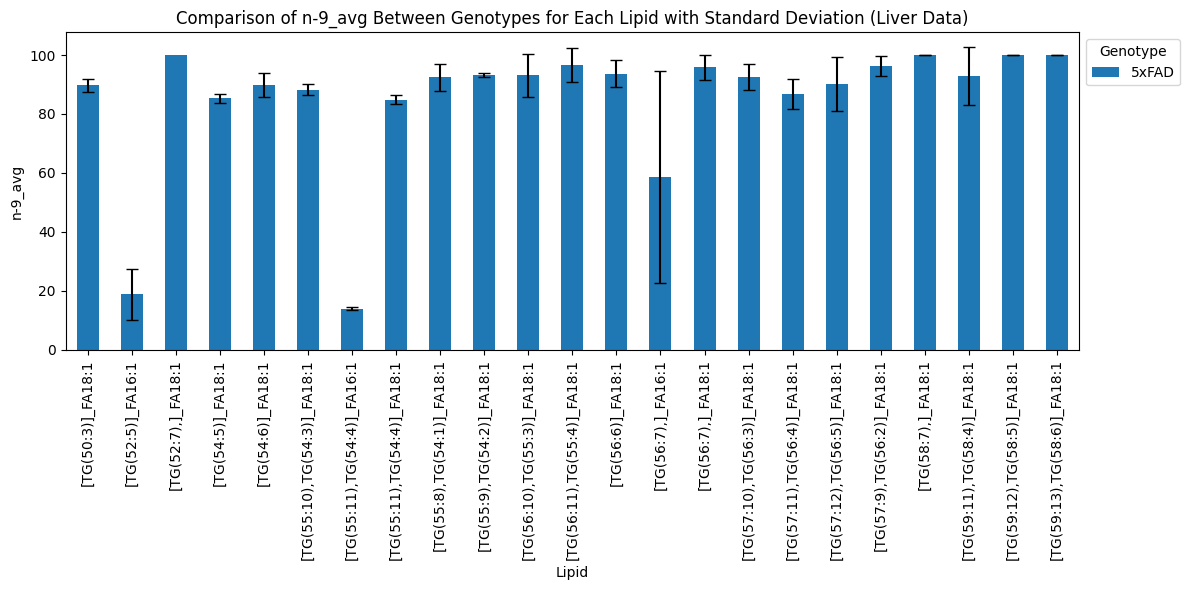

In [51]:
import pandas as pd

# Assuming df3 is your DataFrame
# Create a copy of df3 to df_liver
df_liver = df3.copy()
df_liver = df_liver[df_liver['Biology'] == 'liver']
df_liver
# filter out n-9% >0
df_liver = df_liver[df_liver['n-9%'] > 0]
df_liver
# # Filter to get rows where db_pos is 'n-9' FILTERS FOR ONLY N-9 FOUND  ###################
n_9_df = df_liver[df_liver['db'] == 'n-9']
# Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
filtered_rows = df_liver[(df_liver['Lipid'].str.contains('TG\(58:5\)')) ]

filtered_rows
# ############
# # Create a DataFrame with all possible combinations of 'Lipid' and 'Genotype'
# all_combinations = pd.MultiIndex.from_product([df_liver['Lipid'].unique(), df_liver['Genotype'].unique()], names=['Lipid', 'Genotype']).to_frame(index=False)

# # Add a column for 'n-9%' with zero values
# all_combinations['n-9%'] = 0

# # Concatenate this with the original DataFrame
# df_liver_with_zeros = pd.concat([df_liver, all_combinations]).reset_index(drop=True)

# ###including 0 values where lipid does not exist for a sample
#################


# # Now perform the grouping and aggregation
grouped_liver = n_9_df.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()

grouped_liver.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_liver
df_liver = df_liver.merge(grouped_liver, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_liver['n-9_avg'] = df_liver['n-9_avg'].round(1)
df_liver['std_dev'] = df_liver['std_dev'].round(1)

# # Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
# filtered_rows = df_liver[(df_liver['Lipid'].str.contains('TG\(56:7\)')) ]

# filtered_rows

#print out n-9_avg and std_dev for each lipid
df_liver_drop = df_liver[['Lipid', 'Genotype','n-9_avg', 'std_dev']].drop_duplicates()

# Display the last 50 rows of the DataFrame to verify the results
df_liver

# Pivot the DataFrame to have Genotype as columns
pivot_df_liver = df_liver_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

pivot_df_liver


# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_liver.plot(kind='bar', yerr=df_liver_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9_avg')
plt.title('Comparison of n-9_avg Between Genotypes for Each Lipid with Standard Deviation (Liver Data)')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
plt.show()





BRAIN 5xFAD vs WT

whole brain not working now?

In [52]:

# df_brain2 = df_brain.copy()
# df_brain_drop = df_brain2[['Lipid', 'Genotype','n-9_avg', 'std_dev']].drop_duplicates()


# # Pivot the DataFrame to have Genotype as columns
# pivot_df = df_brain_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')
# pivot_df
# def combined_sort_key(lipid):
#     # Check if lipid contains 'FA16:1'
#     fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

#     # Extract and sort TG values
#     tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
#     tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

#     # Combine the keys
#     return fa16_1_key + tg_list_sorted + lipid

# # Apply the combined sorting function to the Lipid index to create a sorting key
# pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)
# # Sort the DataFrame by the combined sorting key
# pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

# # Drop the combined sorting key column
# pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)
# pivot_df
# # # Plotting
# # fig, ax = plt.subplots(figsize=(12, 6))
# # pivot_df.plot(kind='bar', yerr=pivot_df.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)
# # # Rotating x-axis labels and setting labels/title
# # plt.xlabel('Lipid')
# # plt.ylabel('n-9%')
# # plt.title('Whole Brain n-9% 5xFAD vs WT')
# # plt.xticks(rotation=90)  # Rotate x-axis labels
# # plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
# # plt.tight_layout()
# # # #save figure to Barplot_OzON/9% folder
# # # plt.savefig('Bar%/Max/WholeBrain_5xFADvsWT_9%.png', dpi=300)
# # plt.show()

whole brain fixed? double check

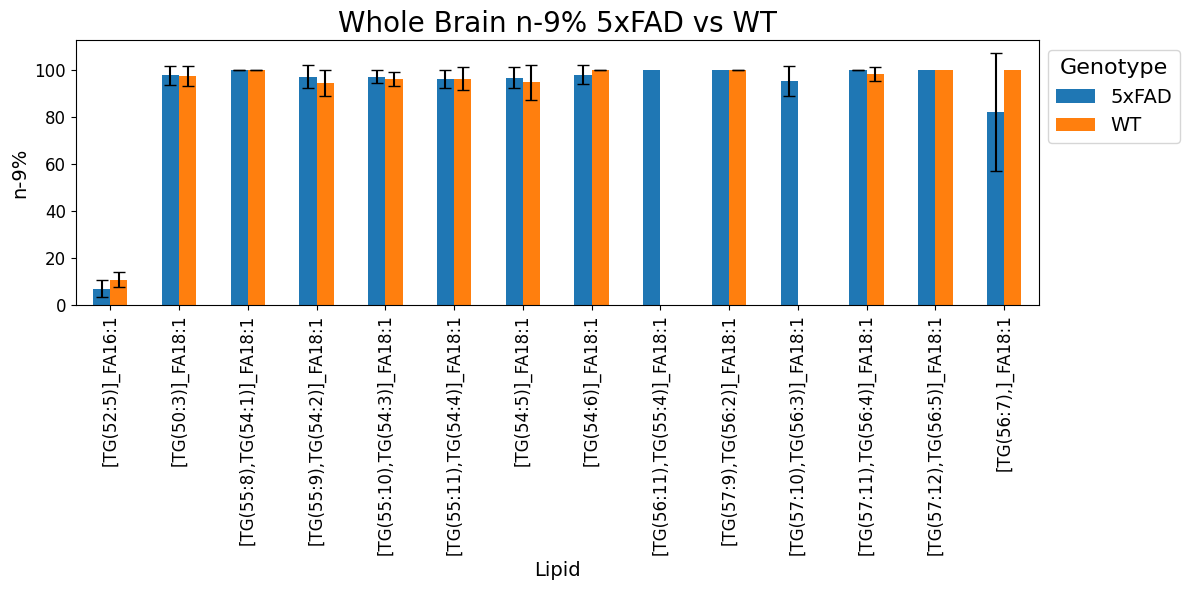

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,WT,10.8,3.2
2,[TG(52:5)]_FA16:1,5xFAD,6.9,3.7
7,[TG(50:3)]_FA18:1,WT,97.7,4.2
14,[TG(50:3)]_FA18:1,5xFAD,97.9,4.0
22,"[TG(55:8),TG(54:1)]_FA18:1",WT,100.0,0.0
25,"[TG(55:8),TG(54:1)]_FA18:1",5xFAD,100.0,0.0
27,"[TG(55:9),TG(54:2)]_FA18:1",WT,94.6,5.4
47,"[TG(55:9),TG(54:2)]_FA18:1",5xFAD,97.3,4.8
70,"[TG(55:10),TG(54:3)]_FA18:1",WT,96.3,2.8
90,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,97.3,2.7


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import re  # Make sure to import re for regular expression operations

# Assuming df_brain contains your whole brain data
df_brain2 = df_brain.copy()
df_brain2


# Filter and drop duplicates
df_brain_drop = df_brain2[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_brain = df_brain_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

# Define the combined sorting function
def combined_sort_key(lipid):
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
    return fa16_1_key + tg_list_sorted + lipid

# Apply the sorting function and sort the DataFrame
pivot_df_brain['Combined_Sort_Key'] = pivot_df_brain.index.to_series().apply(combined_sort_key)
pivot_df_brain.sort_values(by='Combined_Sort_Key', inplace=True)
pivot_df_brain.drop('Combined_Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_brain.plot(kind='bar', yerr=df_brain_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Setting labels and title
plt.xlabel('Lipid', fontsize = 14)
plt.ylabel('n-9%', fontsize =14)
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14, title_fontsize = 16)  # Move legend outside

plt.title('Whole Brain n-9% 5xFAD vs WT', fontsize= 20)
#set x plot to 0

plt.tight_layout()

# # Save figure to folder
plt.savefig('Bar%/Area/WholeBrain_5xFADvsWT_n-9_Percent_Area.pdf', dpi=300)
plt.savefig('Bar%/Area/WholeBrain_5xFADvsWT_n-9_Percent_Area.png', dpi=300)

plt.show()




df_brain_drop.to_csv('Bar%/std/WholeBrain_n9_Percent_std.csv')
df_brain_drop.to_excel('Bar%/std/WholeBrain_n9_Percent_std.xlsx')

df_brain_drop



each brain region 5xfad vs WT

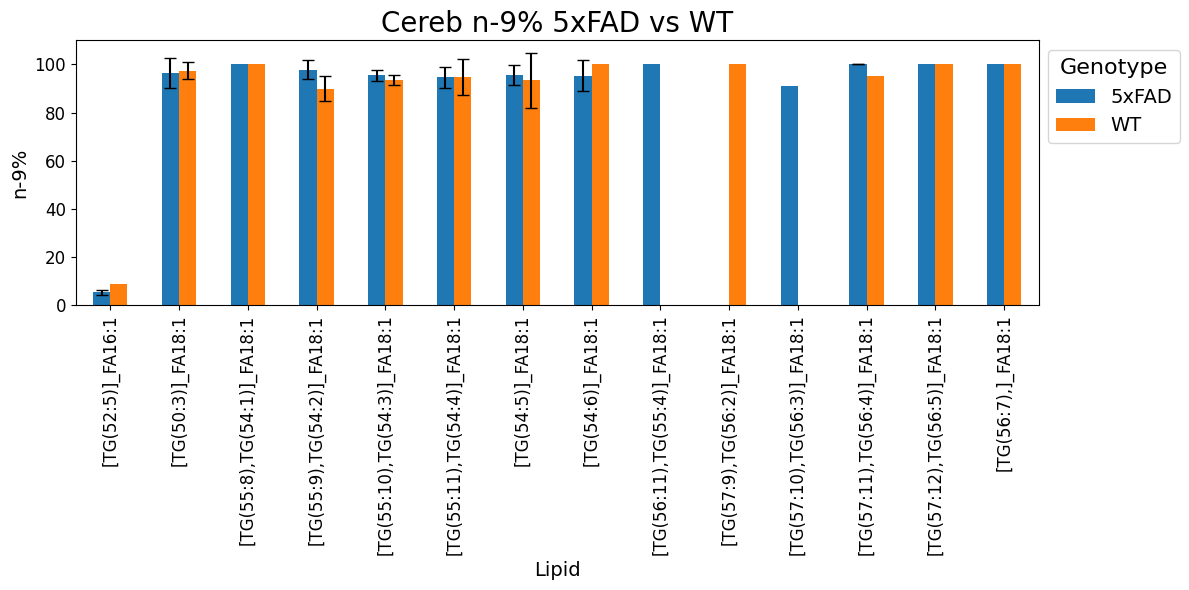

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,WT,8.5,NaN
1,[TG(52:5)]_FA16:1,5xFAD,5.2,1.1
3,[TG(50:3)]_FA18:1,WT,97.4,3.6
5,[TG(50:3)]_FA18:1,5xFAD,96.5,6.1
8,"[TG(55:8),TG(54:1)]_FA18:1",WT,100.0,NaN
9,"[TG(55:8),TG(54:1)]_FA18:1",5xFAD,100.0,NaN
10,"[TG(55:9),TG(54:2)]_FA18:1",WT,89.9,5.3
15,"[TG(55:9),TG(54:2)]_FA18:1",5xFAD,97.8,4.0
21,"[TG(55:10),TG(54:3)]_FA18:1",WT,93.5,2.2
26,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,95.5,2.3


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_brain is your DataFrame from previous steps
df_cereb = df3.copy()
# filter out n-9% >0
df_cereb = df_cereb[df_cereb['n-9%'] > 0]



# Filter to include only rows where Biology is "cereb"
df_cereb = df_cereb[df_cereb['Biology'] == 'cereb']
df_cereb


#filter for only string in Lipid TG(50:3) also filter for genotype
filtered_rows = df_cereb[(df_cereb['Lipid'].str.contains('TG\(54:2\)')) & (df_cereb['Genotype'] == 'WT') ]
filtered_rows
#keep only columns lipid and n-9%
filtered_rows = filtered_rows[['Lipid','Genotype', 'n-9%']]
filtered_rows

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped_cereb = df_cereb.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_cereb
grouped_cereb.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_cereb
df_cereb = df_cereb.merge(grouped_cereb, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_cereb['n-9_avg'] = df_cereb['n-9_avg'].round(1)
df_cereb['std_dev'] = df_cereb['std_dev'].round(1)
df_cereb

#filter for only string in Lipid TG(50:3)
filtered_rows = df_cereb[(df_cereb['Lipid'].str.contains('TG\(50:3\)')) ]
filtered_rows


# Create a copy of df_cereb to df_cereb_drop
df_cereb_drop = df_cereb[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_cereb = df_cereb_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_cereb['Combined_Sort_Key'] = pivot_df_cereb.index.to_series().apply(combined_sort_key)
# Sort the DataFrame by the combined sorting key
pivot_df_cereb = pivot_df_cereb.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_cereb.drop('Combined_Sort_Key', axis=1, inplace=True)
pivot_df_cereb
# # Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_cereb.plot(kind='bar', yerr=df_cereb_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)



# Rotating x-axis labels and setting labels/title
# Setting labels and title
plt.xlabel('Lipid', fontsize = 14)
plt.ylabel('n-9%', fontsize =14)
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14, title_fontsize = 16)  # Move legend outside
plt.title('Cereb n-9% 5xFAD vs WT', fontsize = 20)

plt.tight_layout()
#save figure to Barplot_OzON/9% folder
plt.savefig('Bar%/Area/Cereb_5xFADvsWT_n-9_Percent_Area.pdf', dpi=300)
plt.savefig('Bar%/Area/Cereb_5xFADvsWT_n-9_Percent_Area.png', dpi=300)
plt.show()

df_cereb_drop.to_csv('Bar%/std/Cereb_n9_Percent_std.csv')
df_cereb_drop.to_excel('Bar%/std/Cereb_n9_Percent_std.xlsx')
df_cereb_drop


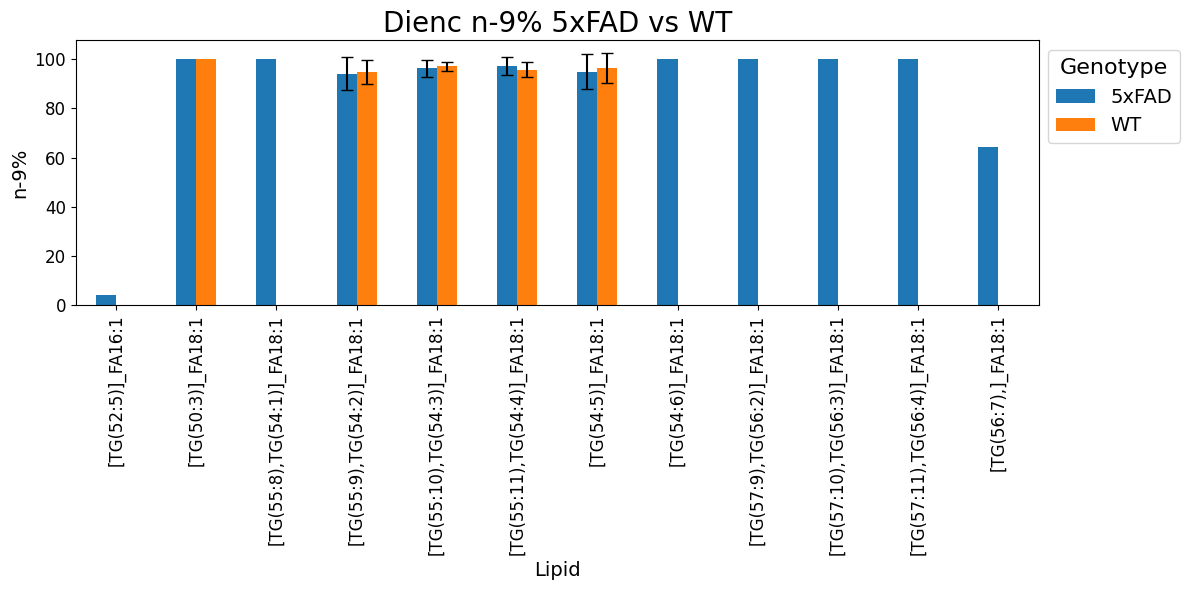

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,5xFAD,3.9,NaN
1,[TG(50:3)]_FA18:1,WT,100.0,NaN
2,[TG(50:3)]_FA18:1,5xFAD,100.0,NaN
3,"[TG(55:8),TG(54:1)]_FA18:1",5xFAD,100.0,NaN
4,"[TG(55:9),TG(54:2)]_FA18:1",WT,94.9,4.9
9,"[TG(55:9),TG(54:2)]_FA18:1",5xFAD,94.1,6.8
15,"[TG(55:10),TG(54:3)]_FA18:1",WT,97.1,1.9
20,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,96.3,3.4
26,"[TG(55:11),TG(54:4)]_FA18:1",WT,95.7,3.1
31,"[TG(55:11),TG(54:4)]_FA18:1",5xFAD,97.3,3.8


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
# Create a copy of df3 for the Dienc region
df_dienc = df3.copy()
df_dienc = df_dienc[(df_dienc['Biology'] == 'dienc') & (df_dienc['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped_dienc = df_dienc.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_dienc.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_dienc
df_dienc = df_dienc.merge(grouped_dienc, on=['Lipid', 'Genotype'], how='left')
df_dienc['n-9_avg'] = df_dienc['n-9_avg'].round(1)
df_dienc['std_dev'] = df_dienc['std_dev'].round(1)

# Create a copy of df_dienc to df_dienc_drop
df_dienc_drop = df_dienc[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_dienc = df_dienc_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_dienc['Combined_Sort_Key'] = pivot_df_dienc.index.to_series().apply(combined_sort_key)
# Sort the DataFrame by the combined sorting key
pivot_df_dienc = pivot_df_dienc.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_dienc.drop('Combined_Sort_Key', axis=1, inplace=True)

# Plotting for Dienc
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_dienc.plot(kind='bar', yerr=df_dienc_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Setting labels and title
plt.xlabel('Lipid', fontsize = 14)
plt.ylabel('n-9%', fontsize =14)
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14, title_fontsize = 16)  # Move legend outside
plt.title('Dienc n-9% 5xFAD vs WT', fontsize = 20)

plt.tight_layout()
plt.savefig('Bar%/Area/Dienc_5xFADvsWT_n-9_Percent_Area.pdf', dpi=300)
plt.savefig('Bar%/Area/Dienc_5xFADvsWT_n-9_Percent_Area.png', dpi=300)
plt.show()


df_dienc_drop.to_csv('Bar%/std/Dienc_n9_Percent_std.csv')
df_dienc_drop.to_excel('Bar%/std/Dienc_n9_Percent_std.xlsx')
df_dienc_drop

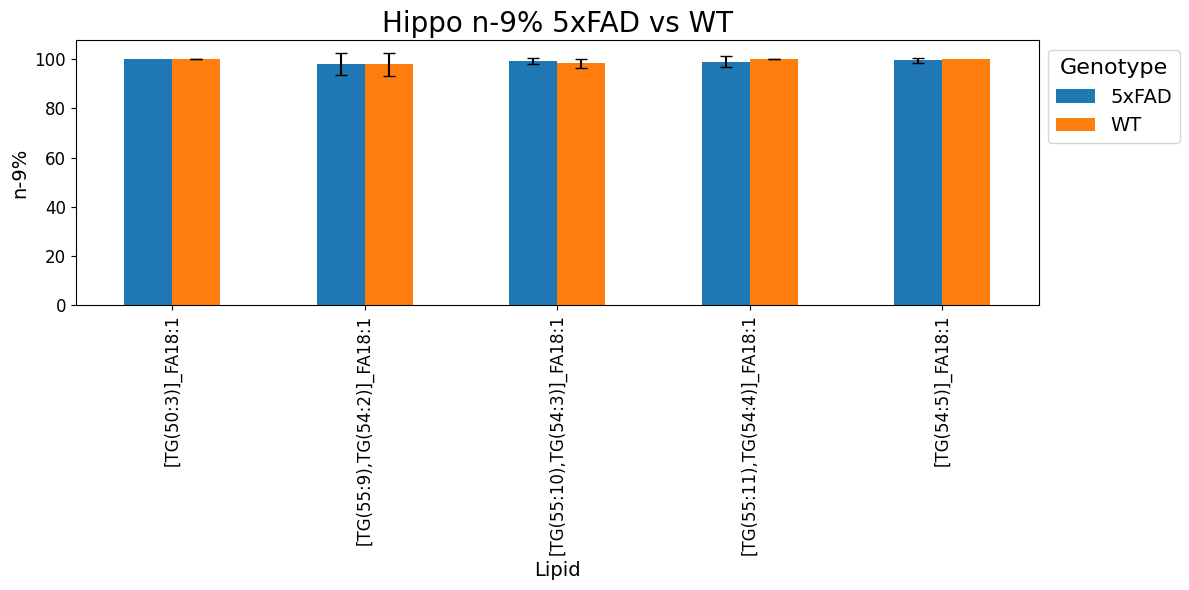

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(50:3)]_FA18:1,WT,100.0,0.0
2,[TG(50:3)]_FA18:1,5xFAD,100.0,NaN
3,"[TG(55:9),TG(54:2)]_FA18:1",WT,97.9,4.7
8,"[TG(55:9),TG(54:2)]_FA18:1",5xFAD,98.2,4.4
14,"[TG(55:10),TG(54:3)]_FA18:1",WT,98.3,1.7
19,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,99.3,1.2
25,"[TG(55:11),TG(54:4)]_FA18:1",WT,100.0,0.0
30,"[TG(55:11),TG(54:4)]_FA18:1",5xFAD,99.1,2.2
36,[TG(54:5)]_FA18:1,WT,100.0,NaN
37,[TG(54:5)]_FA18:1,5xFAD,99.6,1.0


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your original DataFrame
df_hippo = df3.copy()

# Filter to include only rows where Biology is "hippo" and n-9% values are greater than 0
df_hippo = df_hippo[(df_hippo['Biology'] == 'hippo') & (df_hippo['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and standard deviation of n-9%
grouped_hippo = df_hippo.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_hippo

grouped_hippo.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_hippo
df_hippo = df_hippo.merge(grouped_hippo, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_hippo['n-9_avg'] = df_hippo['n-9_avg'].round(1)
df_hippo['std_dev'] = df_hippo['std_dev'].round(1)

# Create a copy of df_hippo to df_hippo_drop
df_hippo_drop = df_hippo[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_hippo = df_hippo_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_hippo['Combined_Sort_Key'] = pivot_df_hippo.index.to_series().apply(combined_sort_key)
# Sort the DataFrame by the combined sorting key
pivot_df_hippo = pivot_df_hippo.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_hippo.drop('Combined_Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_hippo.plot(kind='bar', yerr=df_hippo_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
# Setting labels and title
plt.xlabel('Lipid', fontsize = 14)
plt.ylabel('n-9%', fontsize =14)
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14, title_fontsize = 16)  # Move legend outside
plt.title('Hippo n-9% 5xFAD vs WT',fontsize = 20)


plt.tight_layout()
plt.savefig('Bar%/Area/Hippo_5xFADvsWT_n-9_Percent_Area.pdf', dpi=300)
plt.savefig('Bar%/Area/Hippo_5xFADvsWT_n-9_Percent_Area.png', dpi=300)
plt.show()


df_hippo_drop.to_csv('Bar%/std/Hippo_n9_Percent_std.csv')
df_hippo_drop.to_excel('Bar%/std/Hippo_n9_Percent_std.xlsx')
df_hippo_drop

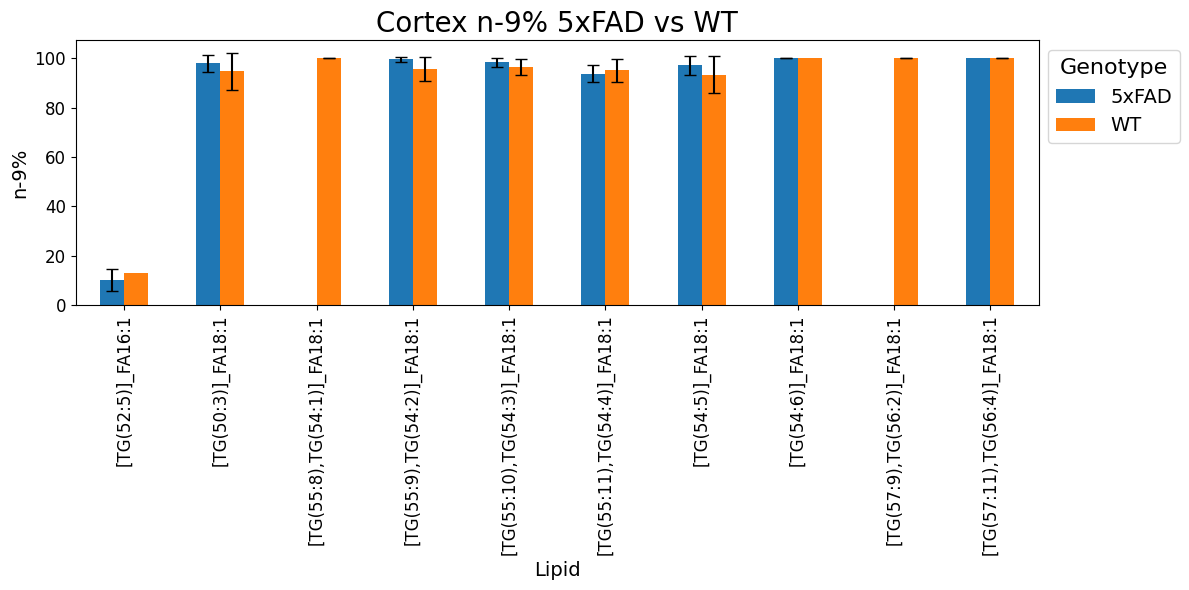

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,WT,13.1,NaN
1,[TG(52:5)]_FA16:1,5xFAD,10.1,4.3
3,[TG(50:3)]_FA18:1,WT,94.7,7.5
5,[TG(50:3)]_FA18:1,5xFAD,98.0,3.5
8,"[TG(55:8),TG(54:1)]_FA18:1",WT,100.0,0.0
10,"[TG(55:9),TG(54:2)]_FA18:1",WT,95.7,4.8
15,"[TG(55:9),TG(54:2)]_FA18:1",5xFAD,99.6,1.0
20,"[TG(55:10),TG(54:3)]_FA18:1",WT,96.5,3.2
25,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,98.4,1.9
30,"[TG(55:11),TG(54:4)]_FA18:1",WT,95.1,4.8


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your original DataFrame
df_cortex = df3.copy()

# Filter to include only rows where Biology is "cortex" and n-9% values are greater than 0
df_cortex = df_cortex[(df_cortex['Biology'] == 'cortex') & (df_cortex['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and standard deviation of n-9%
grouped_cortex = df_cortex.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_cortex.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_cortex
df_cortex = df_cortex.merge(grouped_cortex, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_cortex['n-9_avg'] = df_cortex['n-9_avg'].round(1)
df_cortex['std_dev'] = df_cortex['std_dev'].round(1)

# Create a copy of df_cortex to df_cortex_drop
df_cortex_drop = df_cortex[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_cortex = df_cortex_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')


def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_cortex['Combined_Sort_Key'] = pivot_df_cortex.index.to_series().apply(combined_sort_key)
# Sort the DataFrame by the combined sorting key
pivot_df_cortex = pivot_df_cortex.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_cortex.drop('Combined_Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_cortex.plot(kind='bar', yerr=df_cortex_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
# Setting labels and title
plt.xlabel('Lipid', fontsize = 14)
plt.ylabel('n-9%', fontsize =14)
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14, title_fontsize = 16)  # Move legend outside
plt.title('Cortex n-9% 5xFAD vs WT', fontsize = 20)

plt.tight_layout()
plt.savefig('Bar%/Area/Cortex_5xFADvsWT_n-9_Percent_Area.pdf', dpi=300)
plt.savefig('Bar%/Area/Cortex_5xFADvsWT_n-9_Percent_Area.png', dpi=300)
plt.show()



df_cortex_drop.to_csv('Bar%/std/Cortex_n9_Percent_std.csv')
df_cortex_drop.to_excel('Bar%/std/Cortex_n9_Percent_std.xlsx')
df_cortex_drop


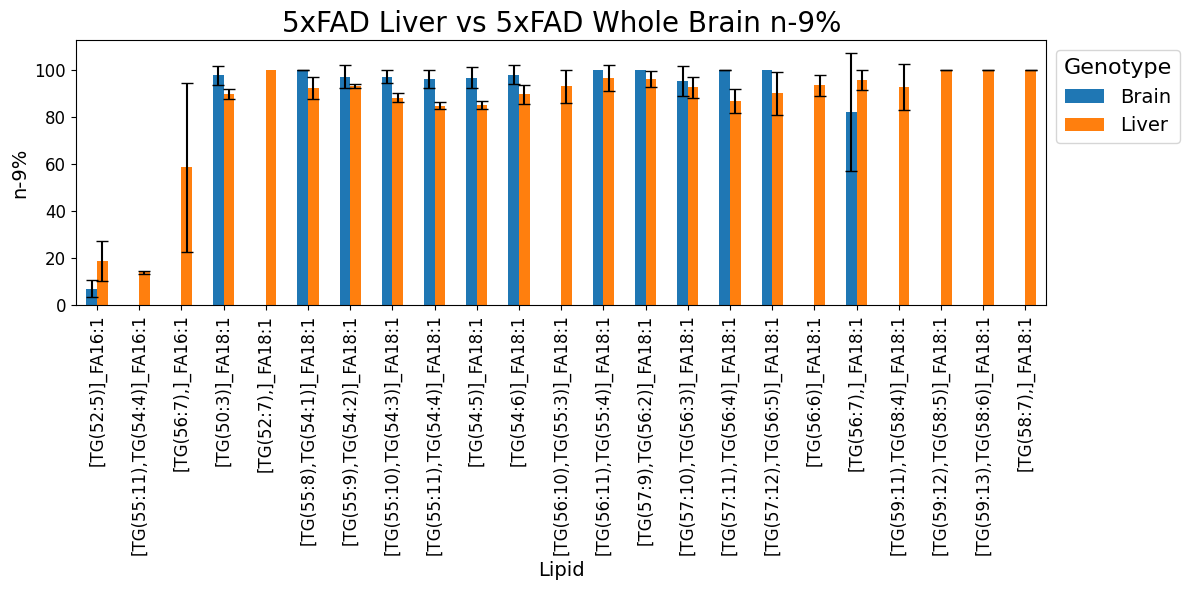

Organ,Brain_std,Liver_std,Brain_std,Liver_std
Lipid,,,,
[TG(52:5)]_FA16:1,6.9,18.8,3.7,8.6
"[TG(55:11),TG(54:4)]_FA16:1",NaN,13.9,NaN,0.6
"[TG(56:7),]_FA16:1",NaN,58.6,NaN,36.0
[TG(50:3)]_FA18:1,97.9,89.8,4.0,2.2
"[TG(52:7),]_FA18:1",NaN,100.0,NaN,NaN
"[TG(55:8),TG(54:1)]_FA18:1",100.0,92.4,0.0,4.7
"[TG(55:9),TG(54:2)]_FA18:1",97.3,93.3,4.8,0.7
"[TG(55:10),TG(54:3)]_FA18:1",97.3,88.3,2.7,2.0
"[TG(55:11),TG(54:4)]_FA18:1",96.3,84.8,3.9,1.5


In [58]:
df_5xfad = pd.concat([df_liver, df_brain])
df_5xfad

# Filter the DataFrame to include only 5xFAD samples
df_5xfad = df_5xfad[df_5xfad['Genotype'] == '5xFAD']
df_5xfad

# Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
filtered_rows = df_5xfad[(df_5xfad['Lipid'].str.contains('TG\(54:6\)')) ]

filtered_rows

# Create a new column 'Organ'
df_5xfad['Organ'] = df_5xfad['Biology'].apply(lambda x: 'Liver' if x == 'liver' else 'Brain')

df_5xfad

# Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
filtered_rows = df_5xfad[(df_5xfad['Lipid'].str.contains('TG\(54:6\)')) ]

filtered_rows


df_5xfad_drop = df_5xfad[['Lipid', 'Organ','n-9_avg', 'std_dev']].drop_duplicates()
# df_5xfad_drop.to_csv('df_5xfad_drop.csv')   
df_5xfad_drop

# Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
filtered_rows = df_5xfad_drop[(df_5xfad_drop['Lipid'].str.contains('TG\(56:7\)')) ]

filtered_rows


# Assuming df_5xfad_drop is created as per your code snippet

# Pivot the DataFrame to have Organ as columns
pivot_df_organ = df_5xfad_drop.pivot(index='Lipid', columns='Organ', values='n-9_avg')
pivot_df_organ
# ############
# # Create a sorting key based on the index (Lipid names) to bring certain lipids first, if applicable
# pivot_df_organ['Sort_Key'] = pivot_df_organ.index.str.contains('FA16:1').astype(int)

# # Sort the DataFrame based on the sorting key
# pivot_df_organ = pivot_df_organ.sort_values(by='Sort_Key', ascending=False)

# # Drop the sorting key column
# pivot_df_organ.drop('Sort_Key', axis=1, inplace=True)

# # Pivot the DataFrame for standard deviation values to be used as error bars
pivot_df_std_dev_organ = df_5xfad_drop.pivot(index='Lipid', columns='Organ', values='std_dev')
pivot_df_std_dev_organ
# ###########
def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df_organ['Combined_Sort_Key'] = pivot_df_organ.index.to_series().apply(combined_sort_key)
# Sort the DataFrame by the combined sorting key
pivot_df_organ = pivot_df_organ.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df_organ.drop('Combined_Sort_Key', axis=1, inplace=True)


pivot_df_organ

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_organ.plot(kind='bar', yerr=pivot_df_std_dev_organ, ax=ax, capsize=4)


# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid', fontsize = 14)
plt.ylabel('n-9%', fontsize =14)
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14, title_fontsize = 16)  # Move legend outside
plt.title('5xFAD Liver vs 5xFAD Whole Brain n-9%', fontsize = 20)

plt.tight_layout()
#save figure to Barplot_OzON/9% folder
plt.savefig('Bar%/Area/LiverVsBrain_5xFAD_n-9_Percent_Area_16Jan24.png', dpi=300)
plt.savefig('Bar%/Area/LiverVsBrain_5xFAD_n-9_Percent_Area_16Jan24.pdf', dpi=300)
plt.show()

liver_brain_std = pd.concat([pivot_df_organ, pivot_df_std_dev_organ], axis=1)
liver_brain_std.rename(columns={"Brain": "Brain_std", "Liver": "Liver_std"}, inplace=True)
liver_brain_std.to_csv('Bar%/std/liver_brain_n9_Percent_std.csv')
liver_brain_std.to_excel('Bar%/std/liver_brain_n9_Percent_std.xlsx')
liver_brain_std

